In [1]:
import matplotlib.pyplot as plt
import h5py

In [3]:
patient_id = 'P23336'
pat = Patient(patient_id=patient_id, h5py_file_path=f'../results/{patient_id}_5.h5')

In [4]:
pat.optimal_angle_key

'25.0_160.1'

In [11]:
import numpy as np
x = [(0,0)]+[(25, a) for a in np.arange(0, 360, 45)]
x

[(0, 0),
 (25, 0),
 (25, 45),
 (25, 90),
 (25, 135),
 (25, 180),
 (25, 225),
 (25, 270),
 (25, 315)]

In [5]:
gaze_angle1 = '25.0_174.2'

In [6]:
metric_weights = [
    {'roi': 'Macula',       'metric': 'D2',     'weight': 3},
    {'roi': 'Macula',       'metric': 'D90',     'weight': 3},
    {'roi': 'OpticalDisc',  'metric': 'D20',    'weight': 3},
    {'roi': 'Cornea',       'metric': 'D20',    'weight': 1},
    {'roi': 'Retina',       'metric': 'V55',    'weight': 1},
    {'roi': 'CiliaryBody',  'metric': 'V27',    'weight': 1},
    {'roi': 'Lens',         'metric': 'D5',     'weight': 1},
    ]

In [1]:
import ast
import numpy as np
import math
import matplotlib.pyplot as plt
from patient_functions.dvh import cumulative_dvh, get_dose_at_volume, get_volume_at_dose

In [2]:
from patient_functions.dvh import cumulative_dvh, get_dose_at_volume, get_volume_at_dose

ModuleNotFoundError: No module named 'patient_functions'

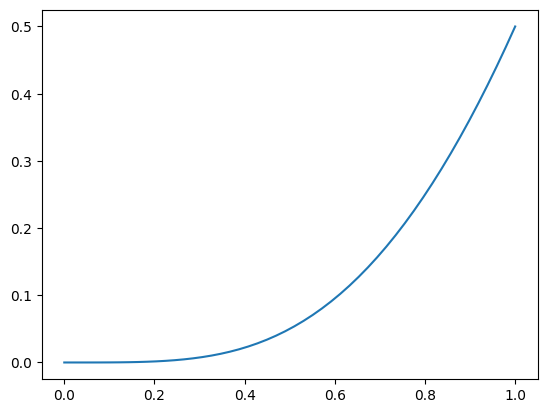

In [31]:
x = np.linspace(0, 1)
y = x**3 *x/(x**2+1)
plt.plot(x, y)

In [39]:
roi_name = 'Chamber'
with h5py.File(f'../test/P23336_9_angles.h5', 'r') as f:
    print(f.attrs['voxel_size'])

6.400000000000001e-05


In [19]:
roi_names = list(dict.fromkeys([f_key.split('_')[0] for f_key in f_keys if '_' in f_key]))
roi_names

['Chamber',
 'CiliaryBody',
 'Cornea',
 'Iris',
 'Lens',
 'Macula',
 'OpticalDisc',
 'OpticalNerve',
 'Retina',
 'Sclera',
 'Tumor',
 'VitreousBody']

In [11]:
opt_weight

0.9999940391390134

In [16]:
opt_cost

1109.682892165571

In [15]:
with h5py.File(f'../results/{patient_id}_5.h5', 'r') as h5f:
    sing_dose = h5f['gaze_angles'][pat.optimal_angle_key]['total_dose'][:]

pat.cost(metric_weights, sing_dose, 1.)


1147.00746136081

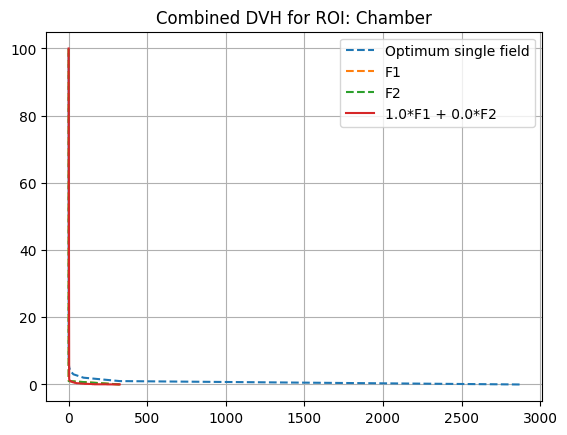

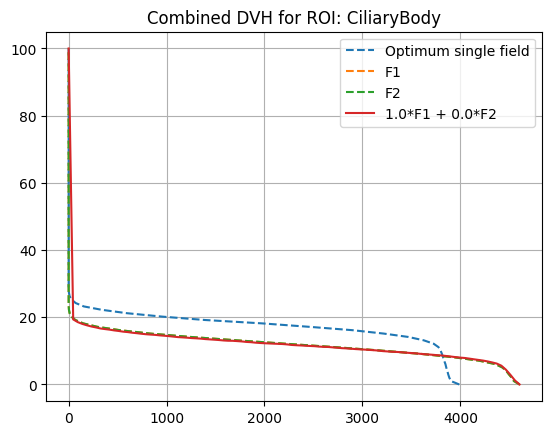

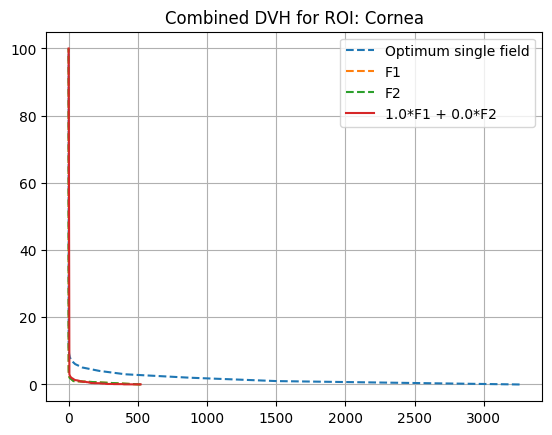

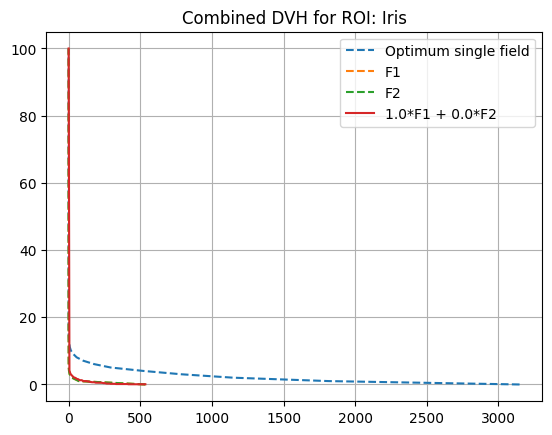

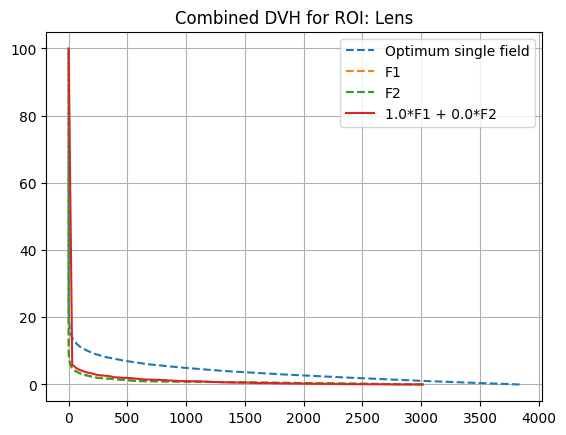

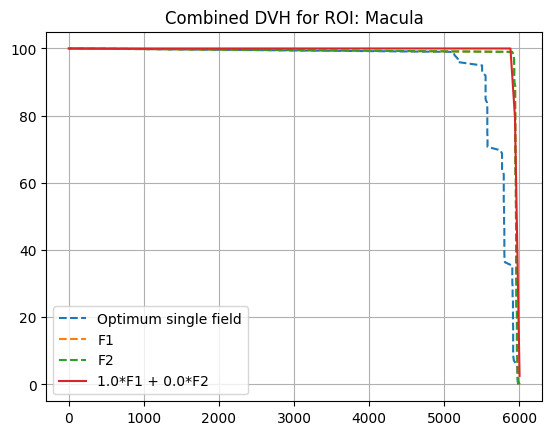

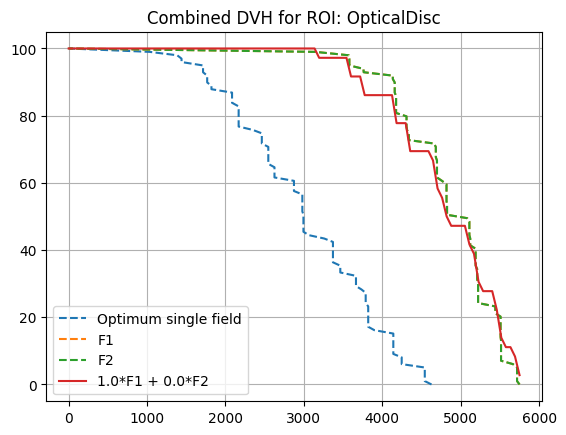

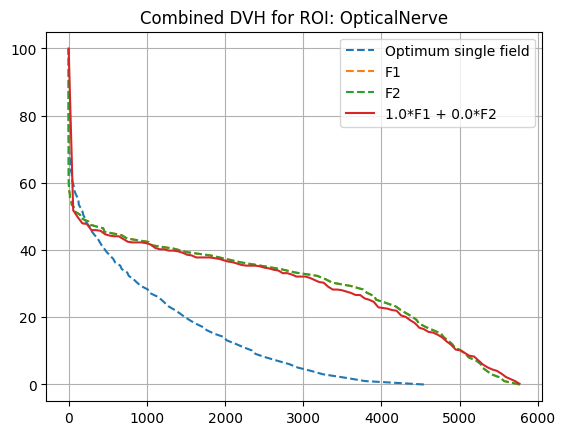

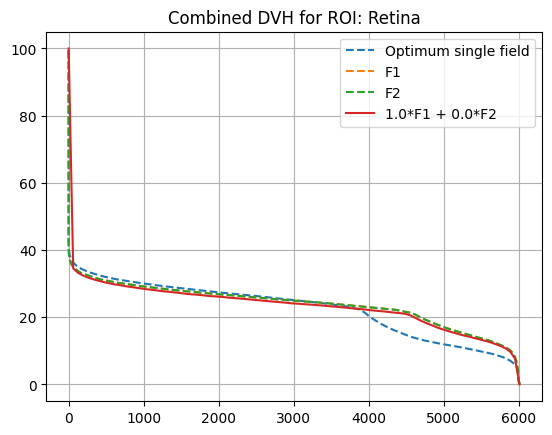

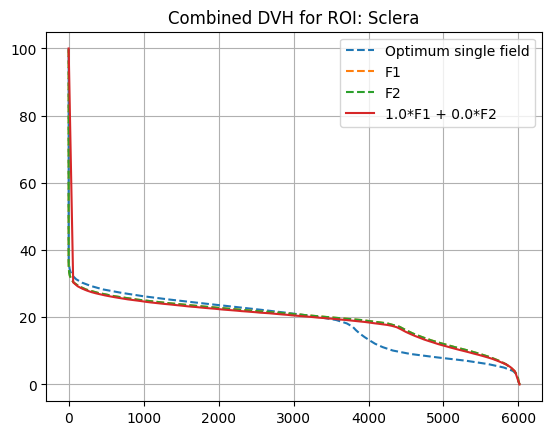

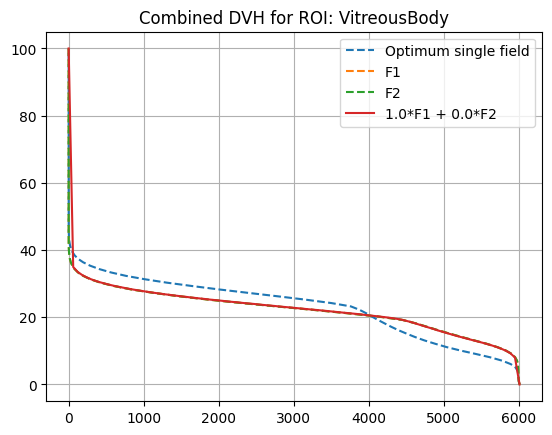

In [14]:
with h5py.File(f'../results/{patient_id}_5.h5', 'r') as h5f:
    dose1 = h5f['gaze_angles'][opt_gaze_angles[0]]['total_dose'][:]
    dose2 = h5f['gaze_angles'][opt_gaze_angles[1]]['total_dose'][:]
    total_dose = dose1 * opt_weight + dose2 * (1 - opt_weight)
    
pat.test_gaze_combination(gaze_angle_keys=opt_gaze_angles, total_dose=total_dose, weight1=opt_weight)

In [ ]:
metric_weights = [
    {'roi': 'Macula',       'metric': 'D2',     'weight': 3},
    {'roi': 'OpticalDisc',  'metric': 'D20',    'weight': 3},
    {'roi': 'Cornea',       'metric': 'D20',    'weight': 1},
    {'roi': 'Retina',       'metric': 'V55',    'weight': 1},
    {'roi': 'CiliaryBody',  'metric': 'V27',    'weight': 1},
    {'roi': 'Lens',         'metric': 'D5',     'weight': 1}]

In [ ]:
weight = next(
    (item["weight"] for item in metric_weights if item["roi"] == 'Tumor'),
    1  # default if not found
)

In [22]:
def read_from_dvh_file(path):
    dvh_data = {}
    with open(path, 'r') as f:
        lines = f.readlines()
        current_roi = None
        for line in lines:
            line = line.strip()
            if line.startswith('#RoiName'):
                current_roi = line.split(':')[1].strip()
                print(current_roi)
                dvh_data[current_roi] = {'dose': [], 'volume': []}
            elif current_roi and line and not line.startswith('#'):
                dose_val, vol_val = map(float, line.split())
                dvh_data[current_roi]['dose'].append(dose_val)
                dvh_data[current_roi]['volume'].append(vol_val)
    return dvh_data

In [24]:
dvhs = read_from_dvh_file('../results/P23336_ray_dvhs.txt')
dvhs['Sclera'].keys()

Sclera
Cornea
OpticalNerve
OpticalDisc
Chamber
CiliaryBody
Iris
Lens
Macula
Retina
VitreousBody
Clip_Clip1
Clip_Clip2
Clip_Clip3
Clip_Clip4
Tumor
External


dict_keys(['dose', 'volume'])

In [28]:
total_dose = [40, 30, 20,3, 1, 23, 5,6]
sorted_dose = np.sort(total_dose)
sorted_dose

array([ 1,  3,  5,  6, 20, 23, 30, 40])

In [32]:
dose = 29
n = len(sorted_dose)

(n - np.searchsorted(sorted_dose, dose, side='left'))*100/n

25.0